In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees_pu = TreeIter(list(map(Tree,fc.eightb.accstudies.signal_list)))

# signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
# signal_trees.extend(kwargs=eightb.reco_all)
# signal_trees.extend(kwargs=eightb.reco_res_all)

In [3]:
all_trees = TreeIter(list(signal_trees)+list(signal_trees_pu))

In [4]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [5]:
dout = "trigger/"

tree = signal_trees[-2]
tree_pu = signal_trees_pu[-2]

In [6]:
varinfo.clear()

In [7]:
trigger = 'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5'

In [8]:
trigger_trees = EventFilter('trigger',**{trigger:1}).filter(signal_trees)

<Array [[True, True, True, ... True, True]] type='100000 * var * bool'>

In [24]:
(5 >> 1) & 1

0

In [10]:
all_trees.extend(kwargs=lambda t : dict(
    pass_8jetpt20=ak.sum((t.jet_pt>20) ,axis=-1)>=8,
    pass_8jetgood=ak.sum( (np.abs(t.jet_eta)<2.4) & (t.jet_pt>20),axis=-1)>=8,
));

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

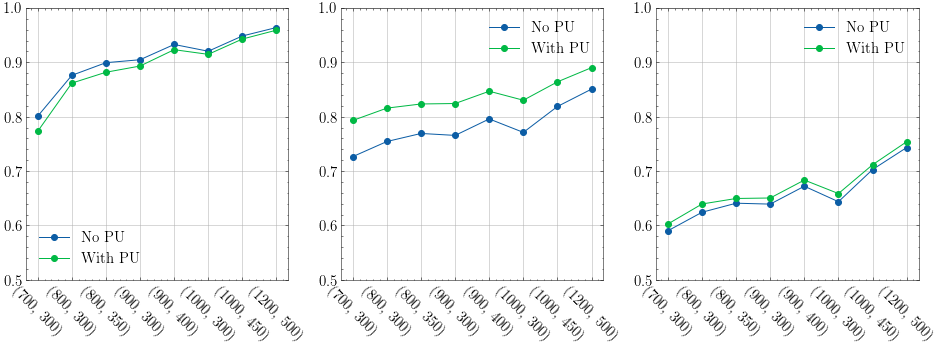

In [14]:
fig,axs = plt.subplots(ncols=3,figsize=(16,5))
for i,mask in enumerate([trigger,'pass_8jetpt20','pass_8jetgood']):
    efficiency = [ ak.sum(t[mask])/ak.count(t[mask]) for t in signal_trees ]
    efficiency_pu = [ ak.sum(t[mask])/ak.count(t[mask]) for t in signal_trees_pu ]
    graph_multi(signal_points,[efficiency,efficiency_pu],labels=["No PU","With PU"],title=mask,xlabel=signal_points,ylim=(0.50,1.0),grid=True,figax=(fig,axs[i]))

(<Figure size 384x360 with 1 Axes>, <AxesSubplot:>)

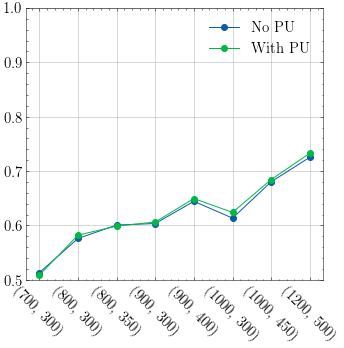

In [17]:
efficiency = [ ak.sum(t[trigger]&t['pass_8jetgood'])/ak.count(t[trigger]) for t in signal_trees ]
efficiency_pu = [ ak.sum(t[trigger]&t['pass_8jetgood'])/ak.count(t[trigger]) for t in signal_trees_pu ]
graph_multi(signal_points,[efficiency,efficiency_pu],labels=["No PU","With PU"],title=trigger,xlabel=signal_points,ylim=(0.50,1.0),grid=True)

In [18]:
all_trees.extend(kwargs = lambda t : build_collection(t,'gen_H\dY\d_b\d','gen_quark'));

In [19]:
all_trees.extend(kwargs = eightb.reco_all);

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

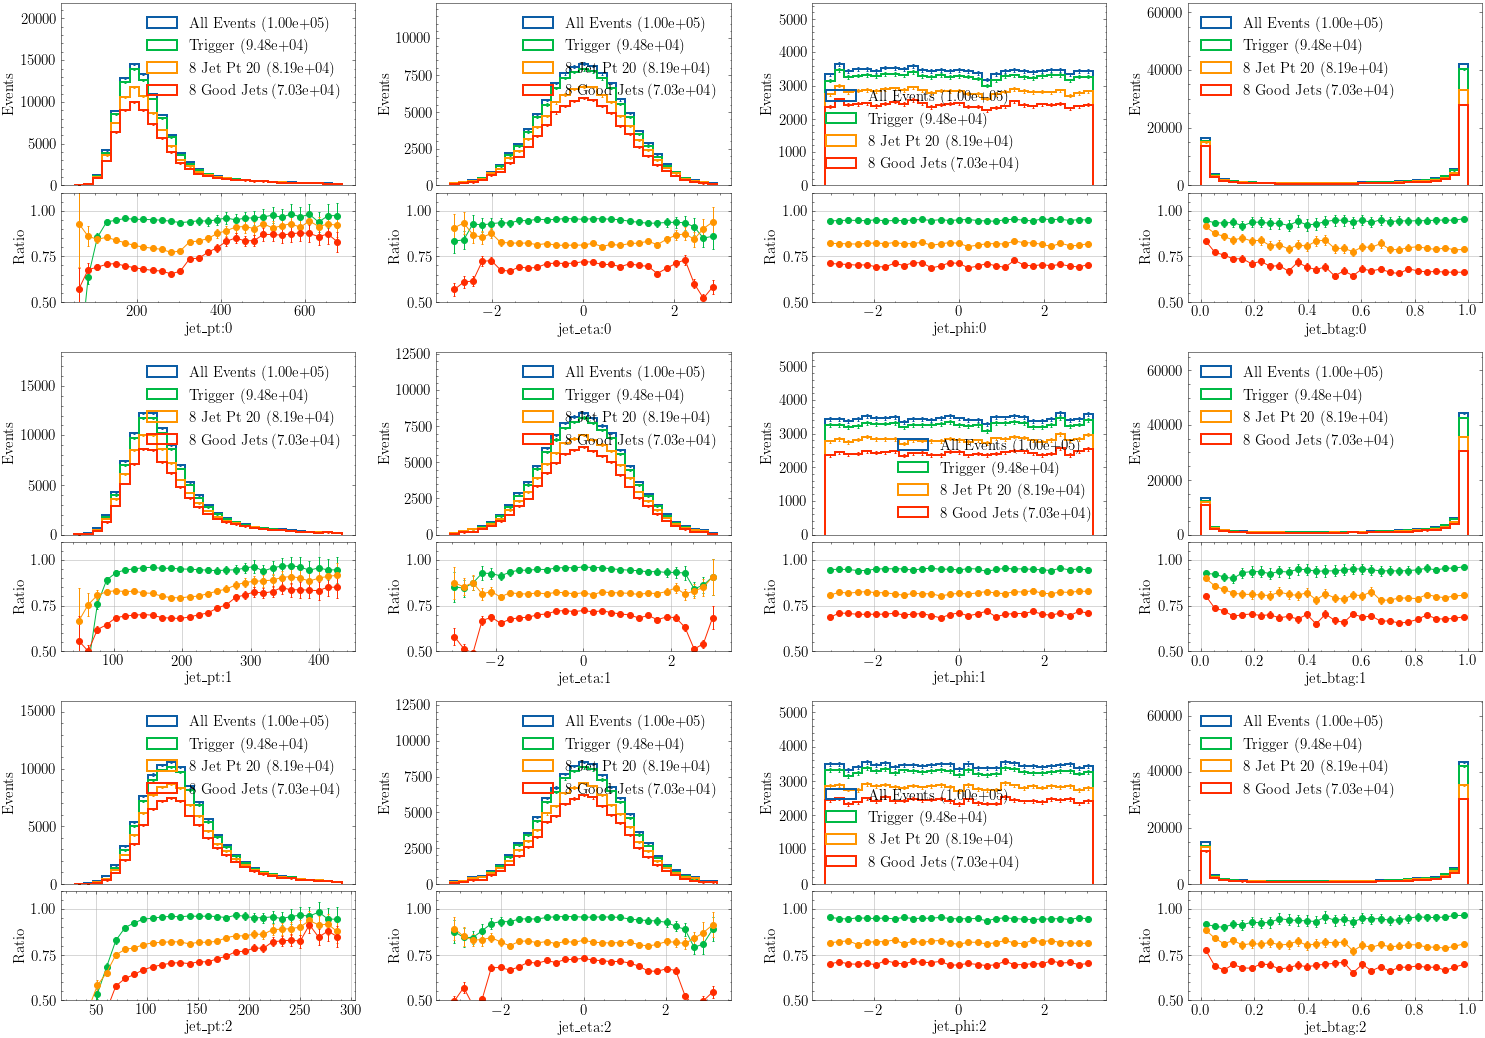

In [54]:
varlist = ['pt','eta','phi','btag']
study.quick(
    [tree,tree,tree,tree],
    masks=[tree.all_events_mask,tree[trigger]==1,tree.pass_8jetpt20,tree.pass_8jetgood],
    varlist=[ f'jet_{var}:{i}' for i in range(3) for var in varlist ],
    s_colors=None,
    labels=['All Events','Trigger','8 Jet Pt 20','8 Good Jets'],
    scale=False,
    ratio=True,
    r_size='60%',
    r_inv=True,
    r_ylim=(0.5,1.1),
    dim=(-1,len(varlist)),
)